In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test_tweets.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [6]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [7]:
train['label'].value_counts()
#In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

label
0    29720
1     2242
Name: count, dtype: int64

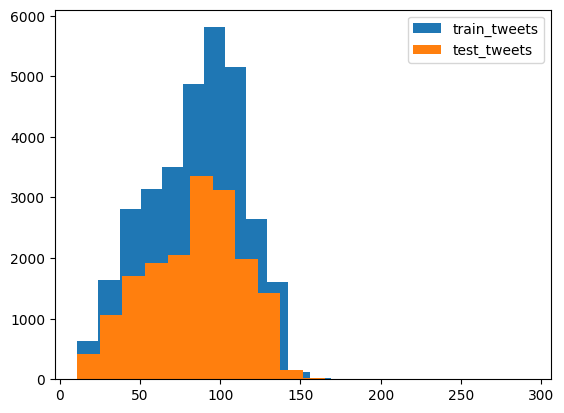

In [8]:
#Now we will check the distribution of length of the tweets, in terms of words, in both train and test data
#hist for creating histogram , legend shows lines,markers etc.
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length,bins=20,label="train_tweets")
plt.hist(test_length,bins=20,label="test_tweets")
plt.legend()
plt.show()

In [9]:
??plt.hist
#we are not giving any parameters

In [10]:
import pandas as pd

In [11]:
#The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.
combi = pd.concat([train, test], ignore_index=True, sort=False)
combi.shape

(49159, 3)

In [12]:
#function to remove unwanted text patterns from the tweets
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt  

In [13]:
#removing twitter handles @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [14]:
#removing punctuations , numbers and spl charecters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
#removing short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split()  if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [16]:
#tokenizing the tweets
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [17]:
#normalize the tweets
# The process of stemming involves removing prefixes, suffixes, and other word variations to normalize words. 
#Sticking the tokens back together refers to reconstructing the original text by combining the stemmed tokens.
from nltk.stem.porter import *
stemmer = PorterStemmer()
#stemming
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

#Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet   

In [18]:
!pip install wordcloud

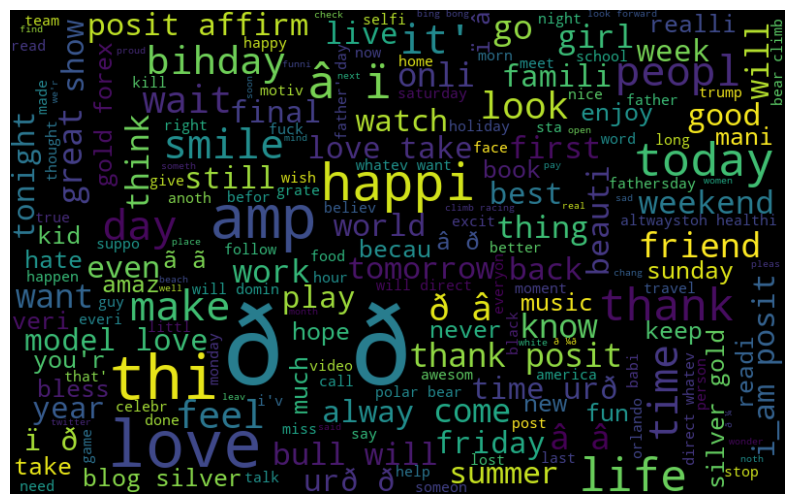

In [19]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

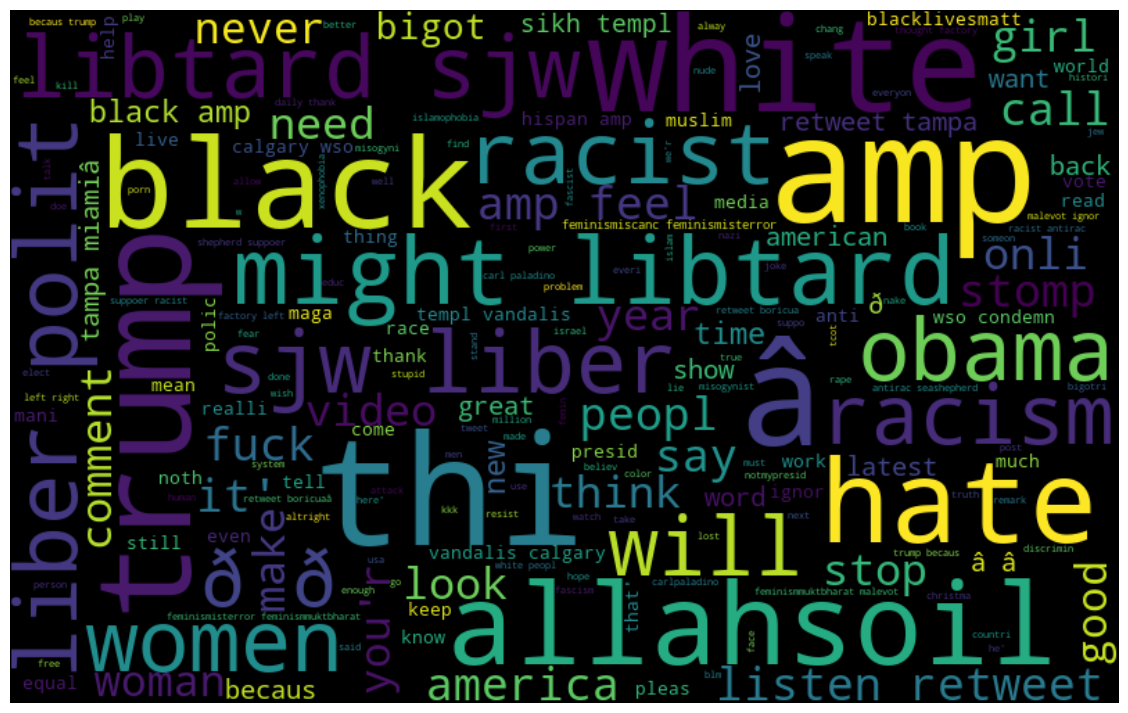

In [20]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [21]:
# function to collect hashtags
def hashtag_extract(x):    
    hashtags = []  
    # Loop over the words in the tweet  
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)     
    return hashtags

In [22]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

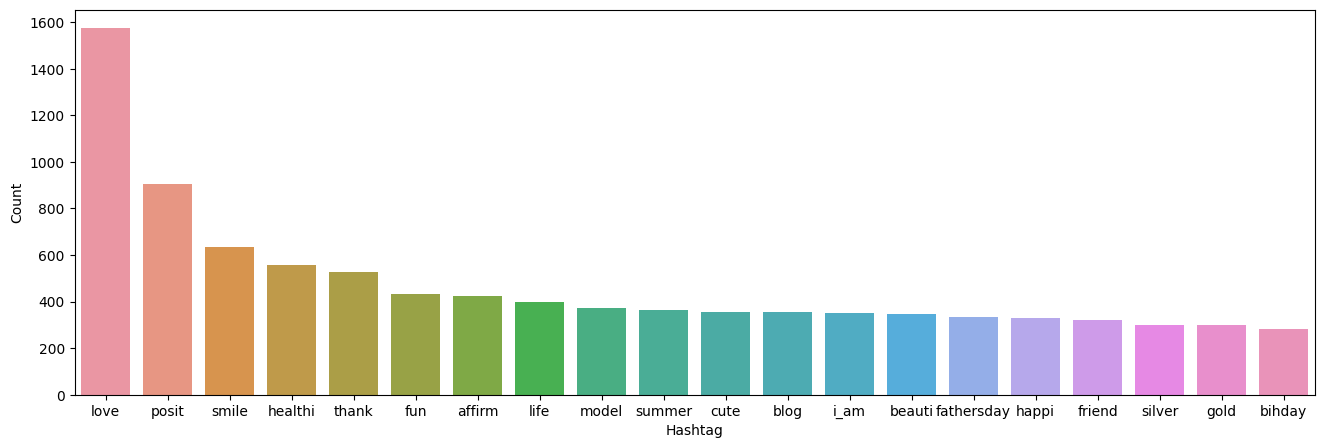

In [23]:
#Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. 
#So, first let’s check the hashtags in the non-racist/sexist tweets.
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

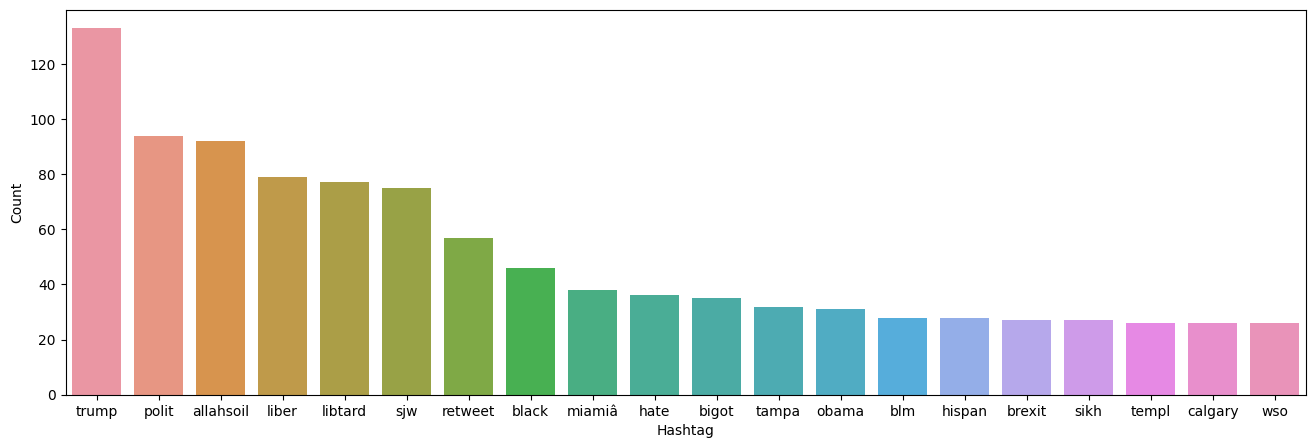

In [24]:
#for racist
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [25]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [26]:
#Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [27]:
#Bag-of-words feature
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [28]:
#another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [29]:
#Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature
#example - King -man +woman = Queen (WORD TO VEC)
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
# tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6704349, 8184140)

In [30]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6739125847816467),
 ('shopping!', 0.615409255027771),
 ('#biall2016', 0.6070243716239929),
 ('lukey', 0.6038573980331421),
 ('enrout', 0.6009198427200317),
 ('sister!!', 0.5972059369087219),
 ('afternoon!', 0.5915719866752625),
 ('#london2016', 0.5875899791717529),
 ('#brunch', 0.5860572457313538),
 ('#toast', 0.5825821757316589)]

In [31]:
model_w2v.wv.most_similar(positive='trump')

[('presidential.', 0.5715309381484985),
 ('fraud.', 0.5622257590293884),
 ('phony.', 0.5559855103492737),
 ('businessman:', 0.5510661602020264),
 ('politician:', 0.5498649477958679),
 ('sexist.', 0.5464989542961121),
 ('suppoer.', 0.545387327671051),
 ('donald', 0.5451189875602722),
 ('jibe', 0.5407761931419373),
 ('churchil', 0.5363768339157104)]

In [32]:
model_w2v.wv.most_similar(positive='food')

[('#desktweet', 0.5986458659172058),
 ('#easesthepain!', 0.5840299725532532),
 ('frenzi', 0.5832557678222656),
 ('#lovinreward', 0.5770933628082275),
 ('friday=', 0.57658851146698),
 ('diabetes/obes', 0.5748723149299622),
 ('benefits!', 0.5566256046295166),
 ('ð\x9f\x98\x82ð\x9f\x98\xadð\x9f\x98©', 0.5528866648674011),
 ('#doplants!', 0.550118088722229),
 ('(share', 0.5378279089927673)]

In [47]:
from sklearn.model_selection import train_test_split

trainbow = bow[:31962,:]
test_bow = bow[31962:,:]
Xtrain, x_test, Ytrain, y_test = train_test_split(trainbow, train['label'], random_state=4)
#bag-of-words: technique used to represent text data as numerical vectors.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [49]:
model = LogisticRegression() 
 
model.fit(Xtrain, Ytrain) 

LogisticRegression()

In [45]:
pred = model.predict(x_test)
f1_score(y_test,pred)
# F1 score is a measure of a model's accuracy that considers both precision and recall

0.4752475247524752

In [39]:
accuracy_score(y_test,pred) 
#accuracy of models predicion

0.9469403078463271

In [46]:
pred_prob = model.predict_proba(x_test) #predict class probabilities and returns an array
pred = pred_prob[:, 1] >= 0.3 #threshold to 0.3, false if greater then or equals to 0.3 otherwise true
pred = pred.astype(int) #converts boolean array(pred) to int, false=0, true=1
f1_score(y_test, pred)

0.5546719681908548

In [43]:
accuracy_score(y_test,pred)

0.9439369290451758

In [44]:
pred_prob[0][1]>=0.3

False